<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/Supervised%20ML%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regularisation

In [1]:
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
data = datasets.load_diabetes()

In [ ]:
data

In [5]:
X = data['data']

y = data['target']

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Transform the features into polynomial features
degree = 10
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [8]:
# Standardize the polynomial features
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

In [9]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()
model.fit(X_train_poly_scaled , y_train)




LinearRegression()

In [13]:
from sklearn.metrics import mean_squared_error
output = model.predict(X_test_poly_scaled)
print('MSE for test:', mean_squared_error(y_test, output))

output = model.predict(X_train_poly_scaled)
print('MSE for train:', mean_squared_error(y_train, output))

MSE for test: 148108.35996367494
MSE for train: 2.0775197660902018e-23


## Lasso and Ridge

In [14]:
from sklearn.linear_model import Lasso, Ridge

In [15]:
lasso_model = Lasso(alpha=0.01)  # Alpha is the regularization strength
ridge_model = Ridge(alpha=1.0)    # Alpha is the regularization strength

In [16]:
# Fit the models to the training data
lasso_model.fit(X_train_poly_scaled, y_train)
ridge_model.fit(X_train_poly_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.558e+04, tolerance: 2.145e+02
  model = cd_fast.enet_coordinate_descent(


Ridge()

In [17]:
lasso_predictions = lasso_model.predict(X_test_poly_scaled)
ridge_predictions = ridge_model.predict(X_test_poly_scaled)

print('test MSE for L1:', mean_squared_error(y_test, lasso_predictions))
print('test MSE for L2:', mean_squared_error(y_test, ridge_predictions))

test MSE for L1: 36918.32497911996
test MSE for L2: 115404.51869417798


# Hyperparameters


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# lets generate a dataset of 100 points
np.random.seed(2)
X = np.random.rand(1000,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(1000,1)

#0.8, 0.2 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
# sklearn.pipeline.make_pipeline(*steps, memory=None, verbose=False)
# *steps --> list of Estimator objects
List of the scikit-learn estimators that are chained together.
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [20]:
def adj_r2(X, y, r2_score):
  return 1 - ((1-r2_score)*(len(y)-1))/(len(y)-X.shape[1]-1)

In [21]:
train_scores = []
test_scores = []
rate_list = [0.0001, 0.001, 0.01, 0.1, 1, 10]
scaler = StandardScaler()
for rate in rate_list:
  polyreg_scaled = make_pipeline(PolynomialFeatures(10), scaler, Ridge(alpha=rate))
  polyreg_scaled.fit(X_train, y_train)
  train_score = polyreg_scaled.score(X_train, y_train)
  test_score= polyreg_scaled.score(X_test, y_test)
  train_scores.append(train_score)
  test_scores.append(test_score)

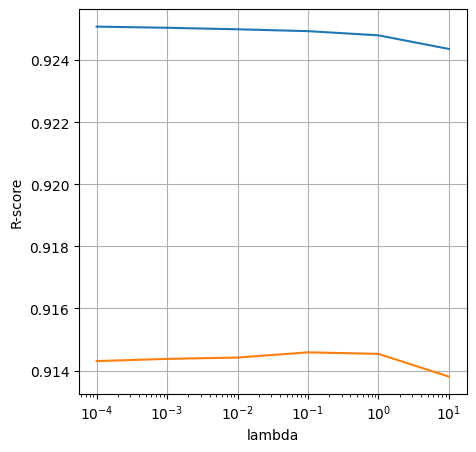

In [30]:
plt.figure(figsize=(5,5))
plt.plot(rate_list, train_scores, label="train")
plt.plot(rate_list, test_scores, label="test")
plt.xlabel("lambda")
plt.ylabel("R-score")
plt.xscale("log")
plt.grid()
plt.show()

In [23]:
print("Best lambda:", rate_list[np.argmax(test_scores)])

Best lambda: 0.1


# Cross Validation

## Normal

In [31]:
# lets generate a dataset of 100 points
np.random.seed(2)
X = np.random.rand(1000,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(1000,1)


In [32]:
#0.6, 0.2, 0.2 split
from sklearn.model_selection import train_test_split
X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)

In [33]:
X_train.shape, X_val.shape, X_test.shape

((600, 1), (200, 1), (200, 1))

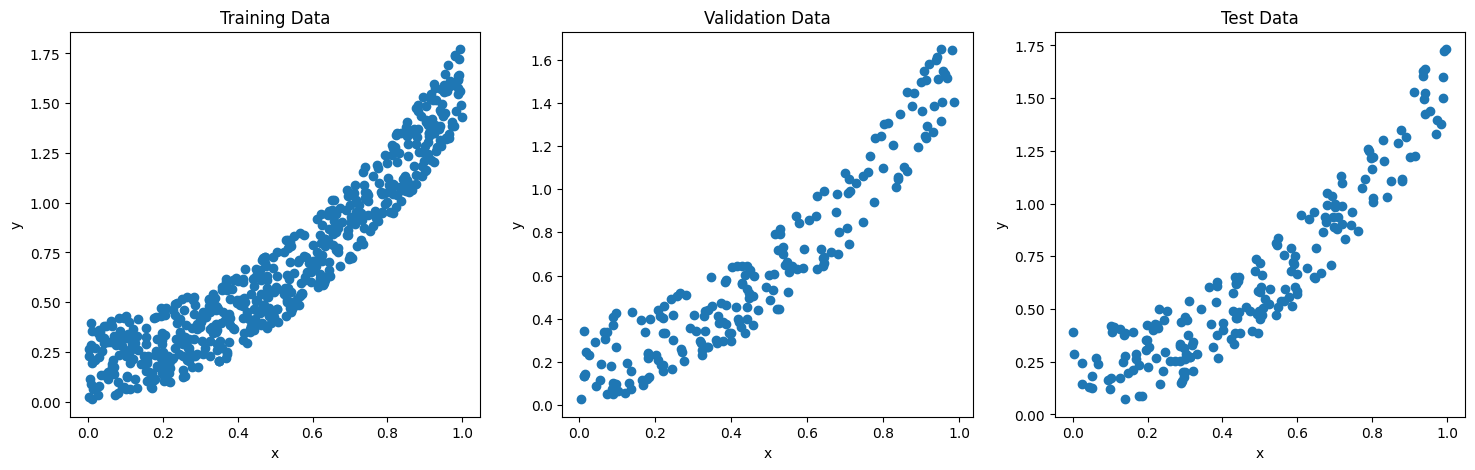

In [34]:
plt.figure(figsize=(18,5))
data_labels = ["Training Data", "Validation Data", "Test Data" ]
x_labels = [X_train, X_val, X_test]
y_labels = [y_train, y_val, y_test]
for i in range(3):
  plt.subplot(1, 3, i+1)
  plt.scatter(x_labels[i], y_labels[i])
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title(data_labels[i])

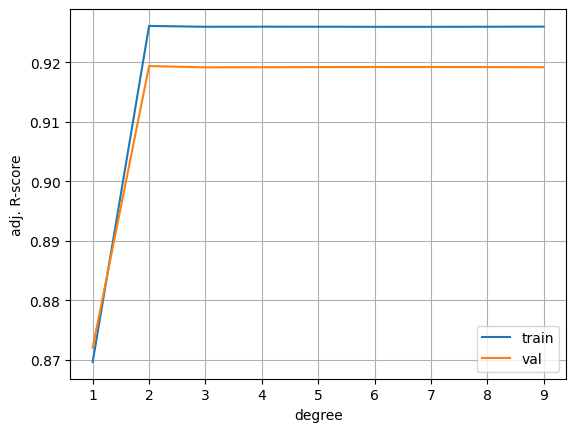

In [36]:
# Same as we did earlier and in the last lecture
max_degree = 10 # max polynomial degree
train_scores = []
val_scores = []
scaler = StandardScaler()
for degree in range(1, max_degree):
    polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, Ridge())
    polyreg_scaled.fit(X_train, y_train)
    train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
    val_score= adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))
    train_scores.append(train_score)
    val_scores.append(val_score)
plt.figure()
plt.plot(list(range(1, max_degree)), train_scores, label="train")
plt.plot(list(range(1, max_degree)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()

In [37]:
train_scores = []
val_scores = []
rate_list = [0.01, 0.1, 1,5, 10]
for rate in rate_list:
    polyreg_scaled = make_pipeline(PolynomialFeatures(3), scaler, Ridge(alpha=rate))
    polyreg_scaled.fit(X_train, y_train)
    train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
    val_score= adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))
    train_scores.append(train_score)
    val_scores.append(val_score)

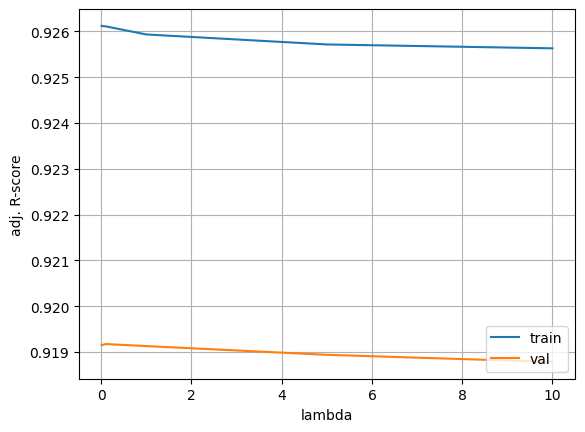

In [38]:
plt.figure()
plt.plot(rate_list, train_scores, label="train")
plt.plot(rate_list, val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()

In [39]:
polyreg_scaled = make_pipeline(PolynomialFeatures(3), scaler, Ridge(alpha=0.01))
polyreg_scaled.fit(X_train, y_train)
train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
print(f'Training Score = {train_score}')
val_score = adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))
print(f'Validation Score = {val_score}')

Training Score = 0.9261212571628987
Validation Score = 0.9191482611247953


In [40]:
# Reporting this as the final score
test_score = adj_r2(X_test, y_test, polyreg_scaled.score(X_test, y_test))
print(f'Testing Score = {test_score}')

Testing Score = 0.9143625261065258


In [ ]:
# Creating a small dataset of 100 data points
np.random.seed(2)
X = np.random.rand(100,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(100,1)

## K-Fold

In [41]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

In [42]:
# Performing k-fold cross validation
degrees = 10 # number of degrees
train_scores = []
val_scores = []

for degree in range(1, degrees):
    fold_train_scores = []
    fold_val_scores = []

    for train_index, val_index in kf.split(X): #iterating through the K-folds

        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
        polyreg_scaled.fit(X_train, y_train) #training model

        train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
        val_score= adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))

        fold_train_scores.append(train_score)
        fold_val_scores.append(val_score)

    train_score = np.mean(fold_train_scores)
    val_score = np.mean(fold_val_scores)

    train_scores.append(train_score)
    val_scores.append(val_score)

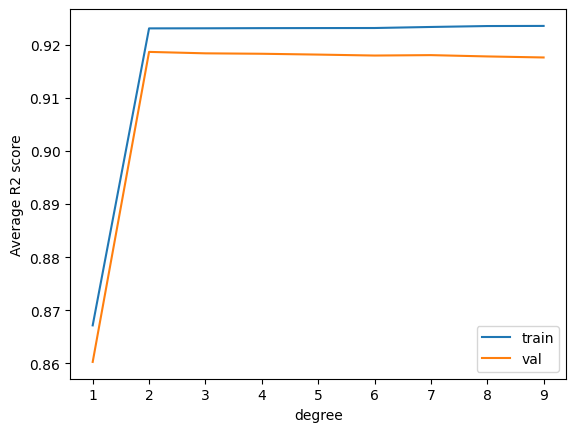

In [44]:
plt.figure()
plt.plot(list(range(1, degrees)), train_scores, label="train")
plt.plot(list(range(1, degrees)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("Average R2 score")
plt.show()

# **Logistic Regression**

In [45]:
!gdown 1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m

Downloading...
From: https://drive.google.com/uc?id=1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m
To: /content/churn_logistic.csv
100% 494k/494k [00:00<00:00, 125MB/s]


In [46]:
import pandas as pd
churn = pd.read_csv("churn_logistic.csv")
churn.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


In [47]:
churn['Churn'].value_counts()

0    2850
1    2850
Name: Churn, dtype: int64

In [48]:
def sigmoid(x):
    return 1/(1+np.e**-x)

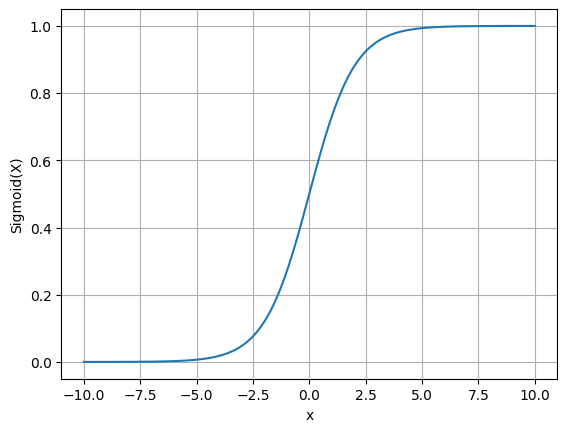

In [51]:
x = np.linspace(-10, 10, 100) # 100 equidistant points between -10 and 10
y = sigmoid(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
plt.grid()
plt.show()

In [52]:
# Loss for a single point
def log_loss(y, y_hat):
  loss = y*np.log(y_hat)+(1-y)*np.log(1-y_hat)
  return -loss

In [53]:
# Case 1, yi=1, high pi
log_loss(1, 0.99)

0.01005033585350145

In [54]:
# Case 2, yi = 1, pi =0.5

log_loss(1, 0.5)

0.6931471805599453

In [55]:
# Case 3, yi = 1, low pi

log_loss(1, 0.1)

2.3025850929940455

In [56]:
#Churn prediction in telecom.
import numpy as np
import matplotlib.pyplot as plt

In [57]:

!gdown 1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m

Downloading...
From: https://drive.google.com/uc?id=1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m
To: /content/churn_logistic.csv
100% 494k/494k [00:00<00:00, 103MB/s]


In [58]:
import pandas as pd
churn = pd.read_csv("churn_logistic.csv")
churn.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


In [59]:
cols = ['Day Mins', 'Eve Mins', 'Night Mins', 'CustServ Calls', 'Account Length']
y = churn["Churn"]
X = churn[cols]
X.shape

(5700, 5)

In [60]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)
X_train.shape

(3420, 5)

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [62]:
X_train

array([[-1.8525591 , -0.54121117,  1.87596728,  0.0724823 ,  2.13378709],
       [ 0.93155078,  1.05292599,  0.39854651, -0.54879454, -0.81991418],
       [ 0.46912157,  0.11462924,  1.13324217,  0.0724823 , -2.27130187],
       ...,
       [-0.52565742, -0.04014136, -0.68543069,  0.69375914,  0.55508469],
       [-0.94359172, -0.58957698, -0.37428909,  1.93631281, -0.36158122],
       [-0.58604336,  2.40910335,  1.70935597,  0.69375914, -0.25972945]])

In [63]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [64]:
model.coef_

array([[0.6844725 , 0.29104522, 0.13637423, 0.79640697, 0.0613349 ]])

In [65]:
model.intercept_

array([-0.01215015])

In [66]:
model.predict(X_train)

array([0, 1, 1, ..., 1, 1, 1])

In [67]:
def accuracy(y_true, y_pred):
    return np.sum(y_true==y_pred)/y_true.shape[0]

In [68]:
# Accuracy for training data
accuracy(y_train, model.predict(X_train))

0.7058479532163743

In [ ]:
# Accuracy for validation data
accuracy(y_val, model.predict(X_val))

## Hyperparameter tuning


In [69]:
from sklearn.pipeline import make_pipeline
train_scores = []
val_scores = []
scaler = StandardScaler()
for la in np.arange(0.01, 5000.0, 100): # range of values of Lambda (Regularization Constant)
    scaled_lr = make_pipeline(scaler, LogisticRegression(C=1/la))
    scaled_lr.fit(X_train, y_train)
    train_score = accuracy(y_train, scaled_lr.predict(X_train))
    val_score = accuracy(y_val, scaled_lr.predict(X_val))
    train_scores.append(train_score)
    val_scores.append(val_score)

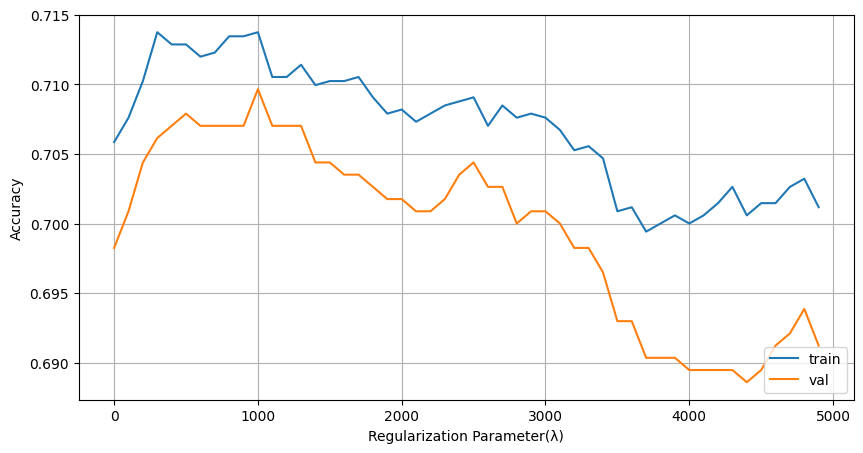

In [70]:
plt.figure(figsize=(10,5))
plt.plot(list(np.arange(0.01, 5000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 5000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [71]:
model = LogisticRegression(C=1/1000)
model.fit(X_train, y_train)

LogisticRegression(C=0.001)

In [72]:
accuracy(y_train, model.predict(X_train))

0.7137426900584796

In [73]:
accuracy(y_val, model.predict(X_val))

0.7096491228070175

In [74]:
accuracy(y_test, model.predict(X_test))

0.7096491228070175

# Multi Class Classification

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.inspection import DecisionBoundaryDisplay

In [76]:
# dataset creation with 3 classes
from sklearn.datasets import make_classification

X, y = make_classification(n_samples= 498,
                           n_features= 2,
                           n_classes = 3,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=5)
y=y.reshape(len(y), 1)

print(X.shape, y.shape)

(498, 2) (498, 1)


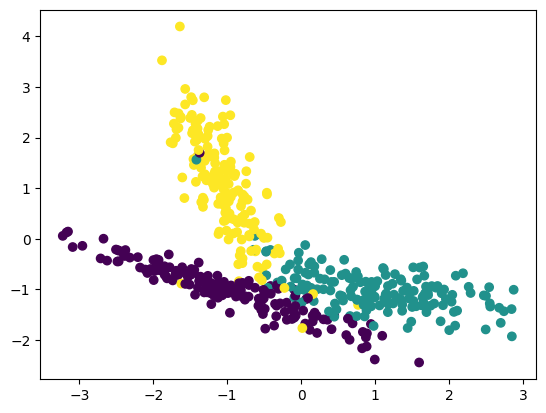

In [77]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()


In [78]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=4)
X_train.shape

(298, 2)

In [79]:
model = LogisticRegression(multi_class='ovr')
# fit model
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(multi_class='ovr')

In [80]:
print(f'Training Accuracy:{model.score(X_train,y_train)}')
print(f'Validation Accuracy :{model.score(X_val,y_val)}')
print(f'Test Accuracy:{model.score(X_test,y_test)}')

Training Accuracy:0.9161073825503355
Validation Accuracy :0.91
Test Accuracy:0.91


<ipython-input-82-aa3a84c38b50>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


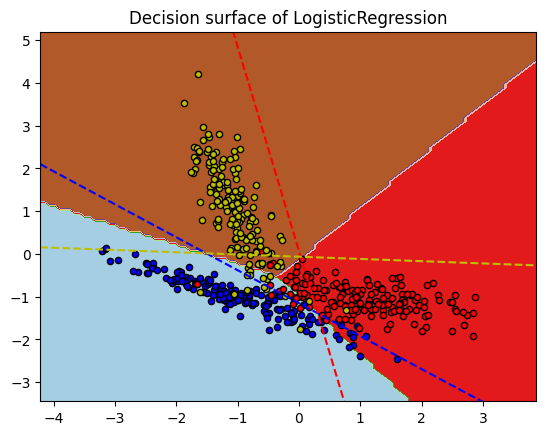

In [82]:
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(model, X, response_method="predict", cmap=plt.cm.Paired, ax=ax)
plt.title("Decision surface of LogisticRegression")
plt.axis("tight")

# Plot also the training points
colors = "bry"
for i, color in zip(model.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor="black", s=20
        )


# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = model.coef_
intercept = model.intercept_

def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

        plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

for i, color in zip(model.classes_, colors):
        plot_hyperplane(i, color)

plt.show()

# Classification Metrics


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
!gdown 1CgBW5H54YfdYtJmYE5GWctaHZSpFt71V

Downloading...
From: https://drive.google.com/uc?id=1CgBW5H54YfdYtJmYE5GWctaHZSpFt71V
To: /content/spam_ham_dataset.csv
100% 5.50M/5.50M [00:00<00:00, 112MB/s]


In [85]:
demo1 = pd.read_csv('spam_ham_dataset.csv')
demo1.drop(['Unnamed: 0','label'],axis=1,inplace=True)
demo1.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [86]:
!gdown 1dw56R8SzKgTgiKurfBLUTxmiewJacMkt

Downloading...
From: https://drive.google.com/uc?id=1dw56R8SzKgTgiKurfBLUTxmiewJacMkt
To: /content/Spam_finalData.csv
100% 1.64M/1.64M [00:00<00:00, 133MB/s]


In [87]:
dt = pd.read_csv('Spam_finalData.csv')

In [88]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(dt.drop(['label_num'],axis=1),dt['label_num'])

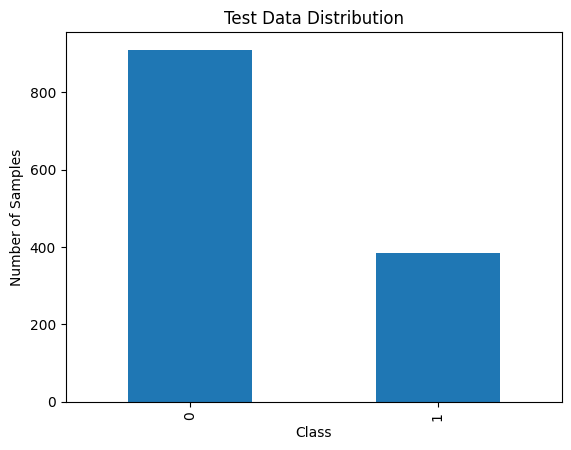

In [89]:
y_test.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Test Data Distribution')
plt.show()

In [90]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [91]:
print('Model Accuracy:',model.score(X_test,y_test))

Model Accuracy: 0.9396751740139211


In [92]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix # 2D np array

array([[860,  49],
       [ 29, 355]])

In [93]:
from matplotlib import pyplot as plt

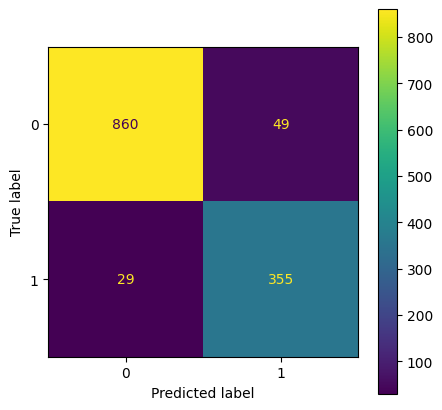

In [94]:
# ax used here to control the size of confusion matrix
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

Finding Accuracy using Confusion Matrix

In [95]:
np.diag(conf_matrix).sum() / conf_matrix.sum()

0.9396751740139211

In [97]:
def precision_calc(conf):
    tp = conf[1,1]
    fp = conf[0,1]

    return tp/(tp+fp)

In [98]:
precision_calc(conf_matrix)

0.8787128712871287

In [99]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.8787128712871287

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

In [100]:
def recall_calc(conf):
    tp = conf[1,1]
    fn = conf[1,0]

    return tp/(tp+fn)

In [101]:
recall_calc(conf_matrix)

0.9244791666666666

In [102]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.9244791666666666

In [ ]:
ConfusionMatrixDisplay(conf_matrix).plot()

In [103]:
pre = precision_calc(conf_matrix)
re = precision_calc(conf_matrix)

f1 = 2* (pre*re)/(pre+re+1e-6)

print(f'f1Score:{f1}')

f1Score:0.8787123712874133


In [104]:
from sklearn.metrics import f1_score

In [106]:
print(f'f1Score:{f1_score(y_test,y_pred)}')

f1Score:0.9010152284263959


In [107]:
from sklearn.metrics import roc_curve, roc_auc_score

In [108]:
probability = model.predict_proba(X_test)

In [109]:
probability

array([[0.41780926, 0.58219074],
       [0.76850792, 0.23149208],
       [0.4283516 , 0.5716484 ],
       ...,
       [0.86554959, 0.13445041],
       [0.9453275 , 0.0546725 ],
       [0.87505127, 0.12494873]])

In [111]:
probabilites = probability[:,1]

In [112]:
fpr, tpr, thr = roc_curve(y_test,probabilites)

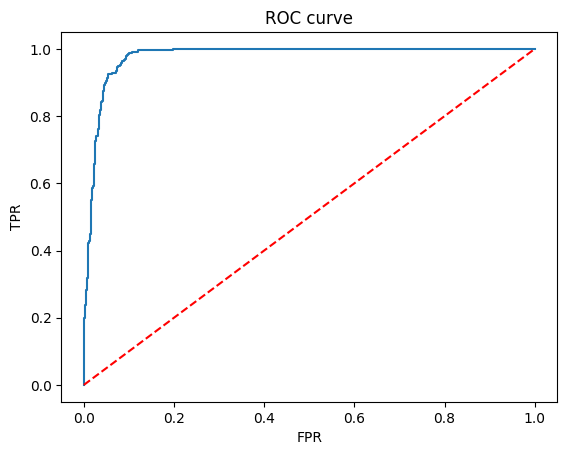

In [113]:
plt.plot(fpr,tpr)

#random model
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [114]:
# AUC
roc_auc_score(y_test,probabilites)

0.9779319077741108

In [115]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [116]:
precision, recall, thr = precision_recall_curve(y_test, probabilites)

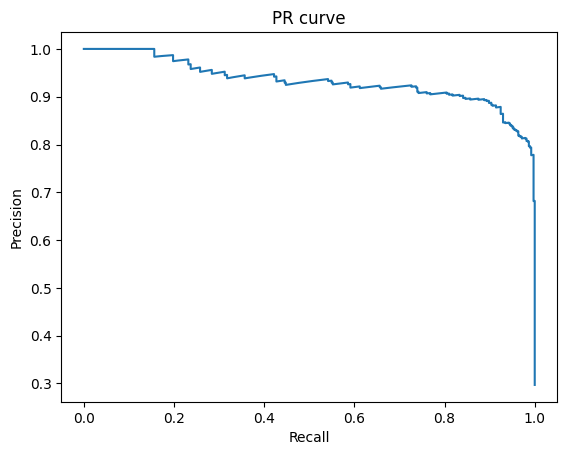

In [117]:
plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [118]:
auc(recall, precision)

0.9329519420016692

# Class Imbalance

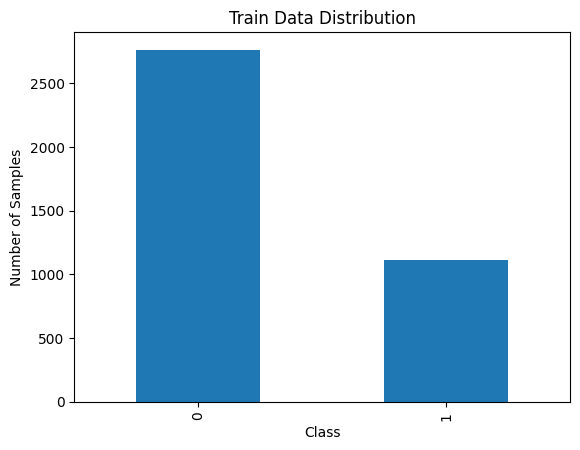

In [119]:
y_train.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Train Data Distribution')
plt.show()

In [121]:
y_train.value_counts()

0    2763
1    1115
Name: label_num, dtype: int64

In [122]:
2763/1115

2.4780269058295965

In [120]:
# Model creation, prediction

def training(model,X_train,y_train,X_test,y_test):

    model.fit(X_train, y_train)

    train_y_pred = model.predict(X_train)
    test_y_pred = model.predict(X_test)

    train_score = f1_score(y_train, train_y_pred)
    test_score = f1_score(y_test, test_y_pred)

    return train_score,test_score


In [123]:
# minority class needs more re-weighting


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model = LogisticRegression(class_weight={0:1,1:2.47})

f1_train,f1_test = training(model,X_train,y_train,X_test,y_test)
print(f'Training F1 score:{f1_train}, Testing F1 score:{f1_test}')

Training F1 score:0.8376327769347496, Testing F1 score:0.8734321550741163


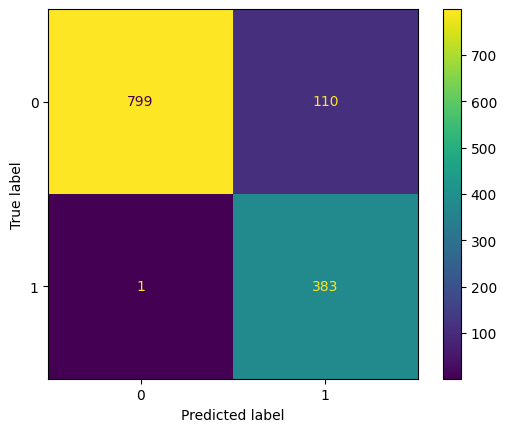

In [124]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(conf_matrix).plot()

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from imblearn.over_sampling import RandomOverSampler

# Create an instance of RandomOverSampler
oversampler = RandomOverSampler()

# Perform oversampling on the training data
print('Before Oversampling')
print(y_train.value_counts())
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

print('After Oversampling')
print(y_train_oversampled.value_counts())

model = LogisticRegression()

f1_train,f1_test = training(model,X_train_oversampled, y_train_oversampled,X_test,y_test)

print(f'Training F1 score:{f1_train}, Testing F1 score:{f1_test}')

Before Oversampling
0    2763
1    1115
Name: label_num, dtype: int64
After Oversampling
0    2763
1    2763
Name: label_num, dtype: int64
Training F1 score:0.9248183814833586, Testing F1 score:0.8724373576309796


In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smt = SMOTE()


# Perform SMOTE on the training data
print('Before SMOTE')
print(y_train.value_counts())

X_sm, y_sm = smt.fit_resample(X_train, y_train)
print('After Oversampling')
print(y_train_oversampled.value_counts())

model = LogisticRegression(C= 5, penalty= 'l1', solver = 'liblinear')

f1_train,f1_test = training(model,X_sm, y_sm,X_test,y_test)

print(f'Training F1 score:{f1_train}, Testing F1 score:{f1_test}')



Before SMOTE
0    2763
1    1115
Name: label_num, dtype: int64
After Oversampling
0    2763
1    2763
Name: label_num, dtype: int64
Training F1 score:0.9491107589364325, Testing F1 score:0.925925925925926
